# Gross-Pitaevskii equation with magnetism

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 10
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = (x - a/2)^2 + (y - a/2)^2
Apot(x, y, z) = .2 * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
C = 500.0
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.649170e+01     1.555727e+01
 * time: 0.001978158950805664
     1     3.519094e+01     9.967908e+00
 * time: 0.00699305534362793
     2     3.354062e+01     1.521212e+01
 * time: 0.012603044509887695
     3     2.205605e+01     2.508400e+00
 * time: 0.019030094146728516
     4     2.030241e+01     2.019429e+00
 * time: 0.024671077728271484
     5     1.963036e+01     1.396988e+00
 * time: 0.030390024185180664
     6     1.903836e+01     1.196200e+00
 * time: 0.035033226013183594
     7     1.869998e+01     1.046438e+00
 * time: 0.039689064025878906
     8     1.846531e+01     7.342833e-01
 * time: 0.04422807693481445
     9     1.831471e+01     1.019899e+00
 * time: 0.04887700080871582
    10     1.819912e+01     7.619910e-01
 * time: 0.05354809761047363
    11     1.809153e+01     8.198319e-01
 * time: 0.05817914009094238
    12     1.800343e+01     9.158313e-01
 * time: 0.061730146408081055
    13     1.793814e+01     1.290895e+00


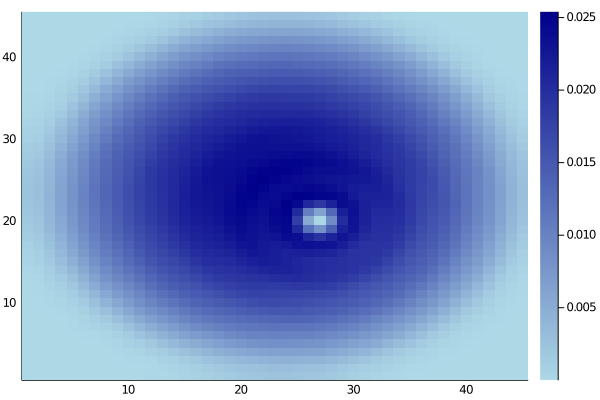

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         PowerNonlinearity(C, α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model, Ecut)
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ.real[:, :, 1], c=:blues)